# Making Figures for Proposal

In [1]:
import lsdtopytools as lsd
from functions import *
import geopandas as gpd
import pandas as pd
import seaborn as sns
import rasterio
import rasterio.plot
from osgeo import gdal

/sciclone/home/ntlewis/research/.conda/lib/python3.8/site-packages/lsdtopytools/geoconvtools.py:79: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit(nopython = False)
/sciclone/home/ntlewis/research/.conda/lib/python3.8/site-packages/lsdtopytools/numba_tools.py:73: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit(nopython=False, parallel = True)


In [2]:
# NE bounds for quadrangles
pound_ap = (37.125,-82.5)
tazwell_south_vr = (37.125,-81.5)
montvale_br = (37.5,-79.625)
dillwyn_p = (37.625,-78.375)

In [3]:
ap_df, ap_dem = generate_ksn(north=pound_ap[0],east=pound_ap[1],name='pound_ap.tiff')
vr_df, vr_dem = generate_ksn(north=tazwell_south_vr[0],east=tazwell_south_vr[1],name='tazwell_south_vr.tiff')
br_df, br_dem = generate_ksn(north=montvale_br[0],east=montvale_br[1],name='montvale_br.tiff')
p_df, p_dem = generate_ksn(north=dillwyn_p[0],east=dillwyn_p[1],name='dillwyn_p.tiff')

Loading the raster from file: /sciclone/home/ntlewis/research/working_files/data/pound_ap.tiff
LOADING TOOK 0.00594639778137207
I am recasting your nodata values to -9999 (standard LSDTT)
PREPROC TOOK 0.051294565200805664
Alright, let me summon control upon the c++ code ...
Got it.
INGESTINGINTO CPP TOOK 0.0026273727416992188
I am an empty LSDJunctionNetwork
Nrows:1509 and ncols:1218
out Nrows:1509 and out ncols:1218

I am an empty LSDJunctionNetwork
Yes, yes, we know. Ignore the above depressing debugging text, that's perfectly normal to feel empty sometimes.
FINALISATION TOOK 0.06464982032775879
lsdtopytools is now ready to roll!
Carving: implementation of Lindsay (2016) DOI: 10.1002/hyp.10648
Filling: implementation of Wang and Liu (2006): https://doi.org/10.1080/13658810500433453
Processing...
I am going to carve/breach your depressions in order to force flow paths.
DEM ready for flow routines!I am using an algorithm from Lindsay et al., 2016 DOI:https://doi.org/10.1002/hyp.10648
I

In [4]:
ninety_five = lambda df : np.percentile(df.m_chi,95)
ninety_five_dict = dict(zip(['ap','vr','br','p'],[ninety_five(x) for x in [ap_df,vr_df,br_df,p_df]]))
print(ninety_five_dict)

{'ap': 6.020859432220457, 'vr': 6.888183164596557, 'br': 6.3976443529129, 'p': 1.2502152502536774}


In [21]:
q3 = lambda df : df.elevation.describe()['75%']
q3_dict = dict(zip(['ap','vr','br','p'],[q3(x) for x in [ap_df,vr_df,br_df,p_df]]))
print(q3_dict)

{'ap': 591.4854736328125, 'vr': 905.6557922363281, 'br': 429.59851837158203, 'p': 167.7201271057129}


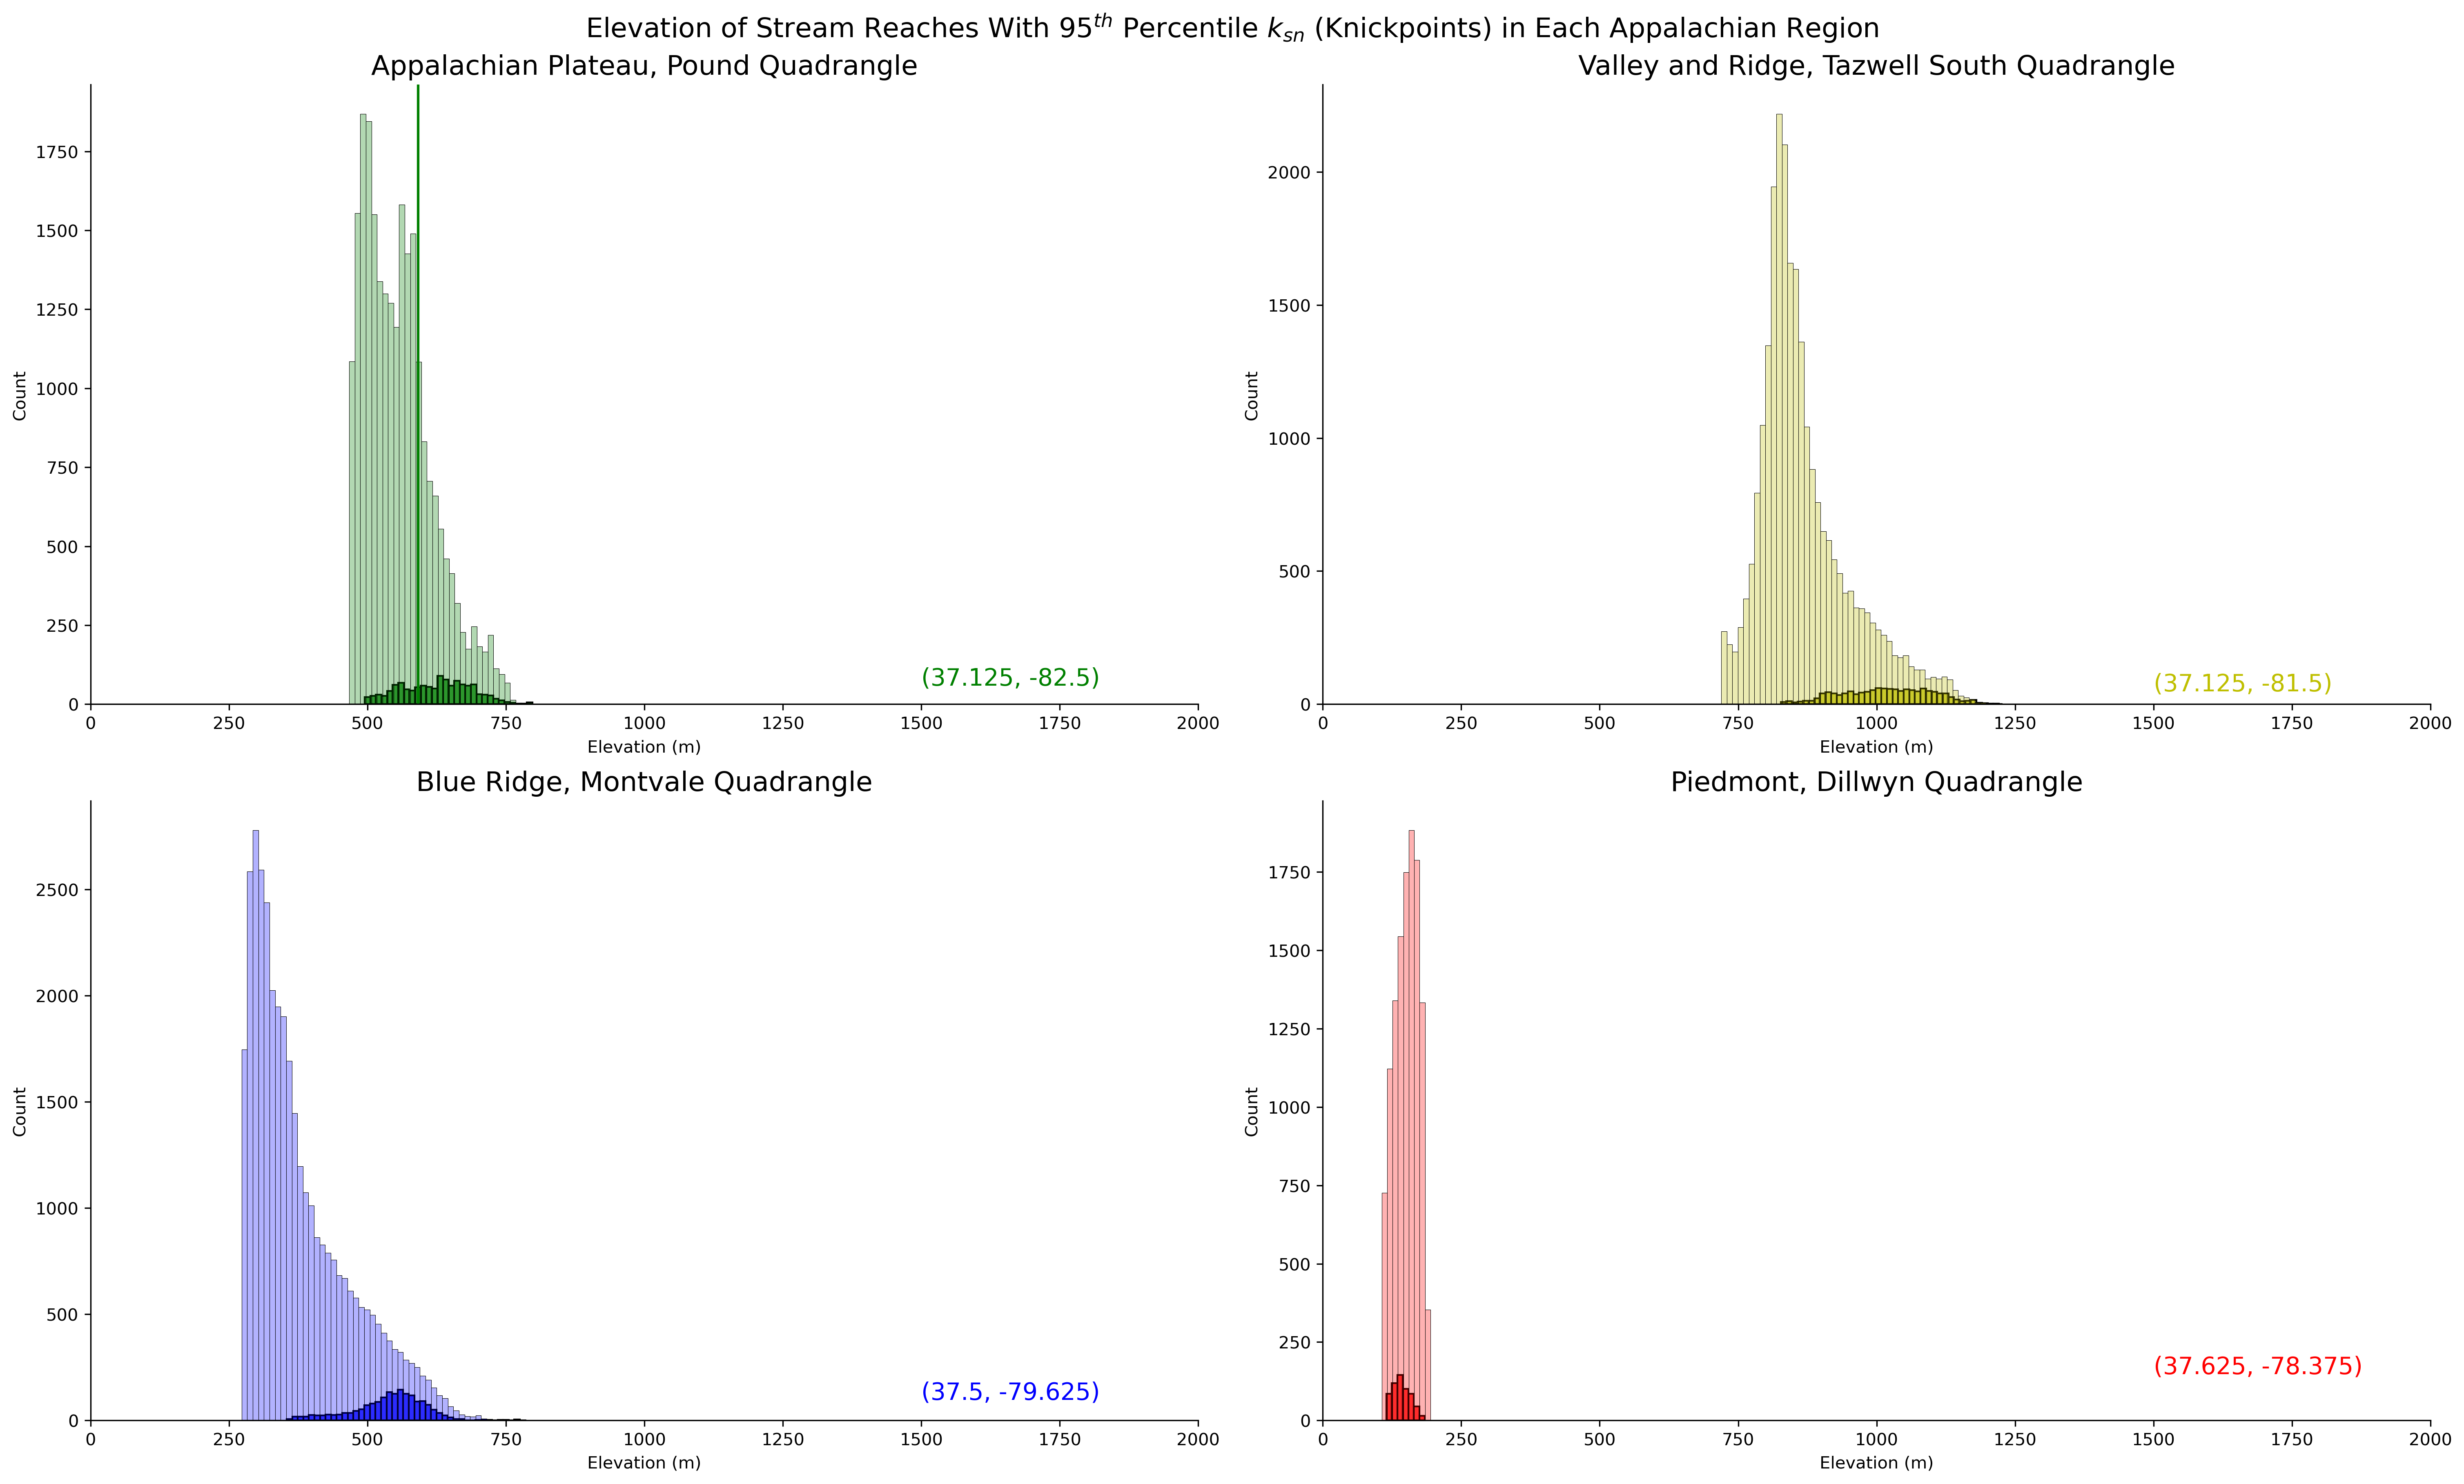

In [25]:
fig, ax = plt.subplots(2,2, figsize=(20,12), dpi=300, constrained_layout=True)
fig.suptitle('Elevation of Stream Reaches With $95^{th}$ Percentile $k_{sn}$ (Knickpoints) in Each Appalachian Region', fontsize=16)
sns.despine()

ap_plot = sns.histplot(data=ap_df[ap_df.m_chi>ninety_five_dict['ap']], x='elevation', ax=ax[0,0], color='g', binwidth=10)
ap_plot.set_xlim(0,2000)
ap_plot.text(x=1500,y=60, s=pound_ap, fontsize=14, c='g')
ap_plot.set_title('Appalachian Plateau, Pound Quadrangle', fontsize=16)
total_ap_stream_plot = sns.histplot(data=ap_df, x='elevation', ax=ax[0,0], binwidth=10, color='g', alpha=0.3)
ax[0,0].axvline(x=q3_dict['ap'], color='g')

vr_plot = sns.histplot(data=vr_df[vr_df.m_chi>ninety_five_dict['vr']], x='elevation', ax=ax[0,1],binwidth=10, color='y')
vr_plot.set_xlim(0,2000)
vr_plot.text(x=1500,y=50, s=tazwell_south_vr, fontsize=14, c='y')
vr_plot.set_title('Valley and Ridge, Tazwell South Quadrangle', fontsize=16)
total_vr_stream_plot = sns.histplot(data=vr_df, x='elevation', ax=ax[0,1], binwidth=10, color='y', alpha=0.3)

br_plot = sns.histplot(data=br_df[br_df.m_chi>ninety_five_dict['br']], x='elevation', ax=ax[1,0],binwidth=10, color='b')
br_plot.set_xlim(0,2000)
br_plot.text(x=1500,y=100, s=montvale_br, fontsize=14, c='b')
br_plot.set_title('Blue Ridge, Montvale Quadrangle', fontsize=16)
total_br_stream_plot = sns.histplot(data=br_df, x='elevation', ax=ax[1,0], binwidth=10, color='b', alpha=0.3)

p_plot = sns.histplot(data=p_df[p_df.m_chi>ninety_five_dict['p']], x='elevation', ax=ax[1,1],binwidth=10, color='r')
p_plot.set_xlim(0,2000)
p_plot.text(x=1500,y=150, s=dillwyn_p, fontsize=14, c='r')
p_plot.set_title('Piedmont, Dillwyn Quadrangle', fontsize=16)
total_p_stream_plot = sns.histplot(data=p_df, x='elevation', ax=ax[1,1], binwidth=10, color='r', alpha=0.3)

for ax in ax.flat:
    ax.set_xlabel('Elevation (m)')
    ax.set_ylabel('Count')

In [6]:
dil = rasterio.open('data/dillwyn_p.tiff')

In [12]:
elevation=dil.read(1)[dil.read(1)>=0]